#### NLTK(Natural Language Toolkit) : 자연어 처리 및 문서 분석용 패키지
#### 말뭉치(corpus), 토큰(token)생성(-단어 단위로 쪼갬), 형태소 분석(어근,어미로 분할), 품사 태깅(동사,명사 등)

### 데이터 마이닝 vs 텍스트 마이닝
1. 데이터 마이닝
 - 데이터에서 의미있는 정보를 찾아내는 기능
 - 통계분석과 모델링기법을 이용하여 데이터 안에 패턴과 관계를 찾아내는 과정
  
  
2. 텍스트 마이닝
 - 비정형 텍스트 데이터에서 분석 도구를 이용하여 패턴을 찾아 정보를 만드는 기술
 - 비정형 데이터를 정형화된 데이터로 정량화하는 과정
 - 자연어 처리 기술에 기반을 둔 텍스트 데이터를 가공하는 기술

In [2]:
# 말뭉치(corpus) : 자연어 분석 작업을 수행하기 위해 만들어진 샘플 문서 집합
import nltk
nltk.download("book", quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
# 저작권이 만료된 문학작품을 포함하고 있는 말뭉치
nltk.corpus.gutenberg.fileids()  # fileids= dir

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")  # raw 원문
print(emma_raw[:1300])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [8]:
# 토큰 생성(tokenizing)
# 토큰(token)은 긴 문자열을 분석하기 위해 작은 단위로 나누는 단위
# 토큰생성함수(tokenizer)
from nltk.tokenize import sent_tokenize   # sent=sentence  # 문장단위로 쪼갬
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [10]:
from nltk.tokenize import word_tokenize  # 단어 단위로 쪼갬
print(word_tokenize(emma_raw[50:100]))

['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [11]:
from nltk.tokenize import RegexpTokenizer  # Regular Expression 정규표현식 (클래스)
pat = RegexpTokenizer("[\w]+")             # pat = pattern
print(pat.tokenize(emma_raw[50:100]))

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']


In [ ]:
# 형태소(Morpheme) : 의미가 있는 가장 작은 말의 단위
# 형태소 분석 : 단어로부터 어근, 접두사, 접미사, 품사... 속성을 파악
# 어간 추출(stemming), 원형 복원(lemmatizing), 품사 부착(pos tagging)  #pos = part of speech

In [13]:
# 어간 추출(stemming) : 접미사나 어미를 제거하여 기본형을 찾는 방법
# PoterStemmer, LancasterStemmer
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']

print("PorterStemmer : ", [st1.stem(w) for w in words])
print("LancasterStemmer : ", [st2.stem(w) for w in words])

PorterStemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
LancasterStemmer :  ['fly', 'fli', 'fly', 'flew', 'flown']


In [14]:
# 원형 복원(lemmatizing) : 사전형으로 통일하는 작업
# 품사(part of speech, pos)를 지정하면 더 정확한 원형을 찾는다.
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w, pos='v') for w in words]   # v = verb 동사

['fly', 'fly', 'fly', 'fly', 'fly']

In [15]:
# 품사 부착(pos tagging)
# NNP(단수 고유명사), VB (동사), VBP(동사 현재형), NN(명사)
# 품사 설명
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [18]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tag_list = pos_tag(word_tokenize(sentence))
tag_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [17]:
nltk.help.upenn_tagset("TO")  # to전치사   ?to부정사

TO: "to" as preposition or infinitive marker
    to


In [19]:
nltk.help.upenn_tagset("DT")  # 관형사

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [20]:
nouns_list = [t[0] for t in tag_list if t[1]=='NN']
nouns_list

['refuse', 'permit']

In [21]:
from nltk.tag import untag   # 품사 없애기
untag(tag_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [24]:
def tokenizer(doc):
    return ["/".join(p) for p in tag_list]
tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [26]:
# Text 클래스
from nltk import Text

text = Text(pat.tokenize(emma_raw))  # 토큰단위로 쪼갠 단어의 빈도수,,

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

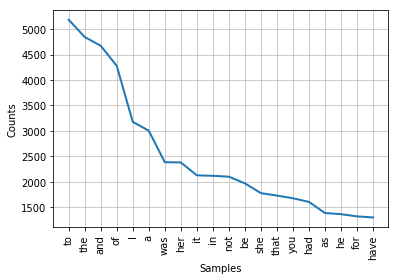

In [28]:
text.plot(20)
plt.show()

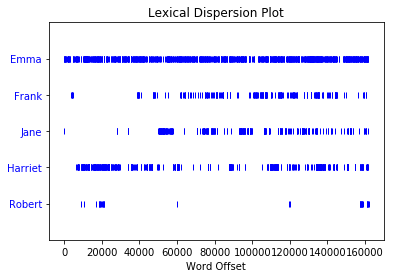

In [29]:
# 단어가 사용된 위치를 시각화하는 메서드
text.dispersion_plot(['Emma', 'Frank', 'Jane', 'Harriet', 'Robert'])  # 문장의 어느 위치에 있는지 시각적으로 보여줌

In [30]:
text.concordance('Emma')  # 용어가 사용된 곳의 앞뒤 단어들을 같이 보여줌

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [31]:
text.similar('Emma')  # '엠마' 대신 많이 사용된 단어들 찾아줌

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [32]:
text.common_contexts(['Emma', 'she'])  # 두 단어의 공통된 문맥을 찾아 보여줌

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


In [33]:
# FreqDist : 문서에 사용된 단어(토큰)의 사용빈도에 따라 정보를 담는 클래스
fd = text.vocab()     #vocab 빈도값  
type(fd)

nltk.probability.FreqDist

In [46]:
# 불용어(stop words) : 빈번하게 사용되지만, 구체적인 의미를 찾기 어려운 단어
# 불용어 사전에 등록되어있음.. (한국어는 그딴거없다-_)
from nltk.corpus import stopwords
# 사용자가 불용어를 추가하는 작업 - 실패
#words = ['chief', 'of', 'the']
#stopwords.words('english')[:10] 
#print(stopwords.words('english'))
#words ="""
# Emma Woodhouse, handsome, clever, and rich, with a comfortable home
# and happy disposition, seemed to unite some of the best blessings
# of existence; and had lived nearly twenty-one years in the world
# with very little to distress or vex her.
# """
# words = ['chief','justics','roberts',",",'1234','of','the','or']
#print(stopwords.words('english'))#10])
# words=['추석','연휴','민족','대이동','뭘봐','사과','늘어','교통량',
#        '교통사고','특히','고장','자동차','상당수','나타','기자']

words2 = ['justice','the','a','all','or','robers','not']
# 불용어를 제거한 리스트
print([w for w in words2 if not w in stopwords.words('english')])

['justice', 'robers']


In [56]:
from nltk import FreqDist
# nltk 말뭉치
# emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")

# 토큰생성
# from nltk.tokenize import RegexpTokenizer  # Regular Expression 정규표현식 (클래스)
# pat = RegexpTokenizer("[\w]+")             # pat = pattern
# emma_token = pat.tokenize(emma_raw)      # emma를 토큰단위로 쪼갬 - 정규표현식 사용
emma_token=pos_tag(pat.tokenize(emma_raw)) # 단어,품사 형태로 출력 (품사 pos)

#별도의 불용어
stopwords=['Mr', 'Mrs', 'Miss', 'Dear', 'Mr.', 'Mrs.']

# NNP 고유대명사만 뽑아냄
# names_list = [t[0] for t in emma_token if t[1]=='NNP' and t[0] not in stopwords.words('english')]
names_list = [t[0] for t in emma_token if t[1]=='NNP' and t[0] not in stopwords]

fd_names = FreqDist(names_list)

In [57]:
# fd_names의 전체 단어수 출력
fd_names.N()  # N == count

7863

In [60]:
# 출현횟수
fd_names['Emma']

830

In [62]:
# 확률(빈도)
fd_names.freq('Emma')

0.10555767518758744

In [63]:
# 가장 출현횟수가 높은 단어
fd_names.most_common(10)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208)]

In [ ]:
# https://amueller.github.io/word_cloud/

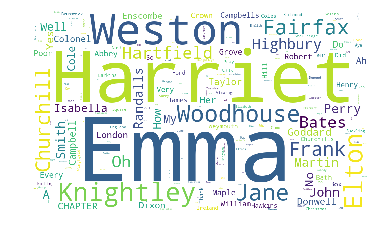

In [69]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=600, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()

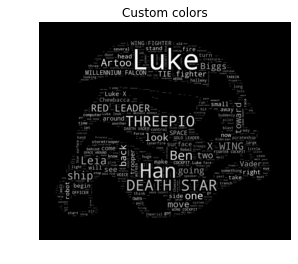

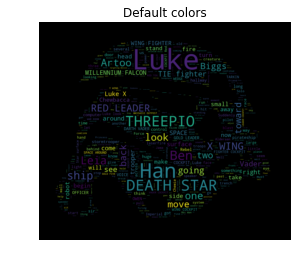

In [2]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS

def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
# mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))
mask = np.array(Image.open(path.join(d, "D:/python3/data/starwars.png")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
# text = open(path.join(d, 'a_new_hope.txt')).read()
text = open(path.join(d, 'D:/python3/data/a_new_hope.txt')).read()

# pre-processing the text a little bit
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("D:/python3/data/a_new_hope.png")

plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

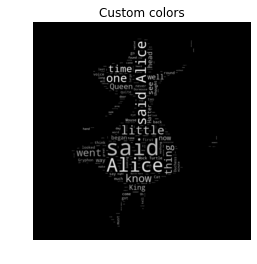

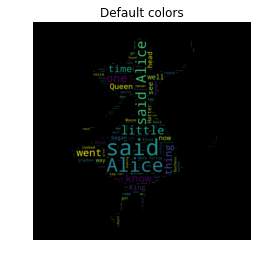

In [3]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS

def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
# mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))
mask = np.array(Image.open(path.join(d, "D:/python3/data/alice.png")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
# text = open(path.join(d, 'a_new_hope.txt')).read()
text = open(path.join(d, 'D:/python3/data/alice.txt')).read()

# pre-processing the text a little bit
# text = text.replace("HAN", "Han")
# text = text.replace("LUKE'S", "Luke")

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("D:/python3/data/wonderland.png")

plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

In [5]:
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def makeImage(text):
    alice_mask = np.array(Image.open("D:/python3/data/alice.png"))

    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, 'alice.txt'), encoding='utf-8')
text = text.read()
makeImage(getFrequencyDictForText(text))

ModuleNotFoundError: No module named 'multidict'

In [ ]:
# 한글 자연어 처리 : KoNLPy
# java 기반 => JDK 설치  java.com/ko/download
# JType 설치           # jre-8u291-windows-x64.exe
# konlpy 설치          # pip install konlpy

In [3]:
# 한글 형태소 분석기 : 한나눔, 꼬꼬마, ???
from konlpy.tag import Kkma
kkma = Kkma()
# C:\Anaconda3\lib\site-packages\konlpy\tag\_kkma.py
# C:\Anaconda3\lib\site-packages\konlpy\jvm.py

In [7]:
import sys
sys.version

'3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]'

In [4]:
kkma.sentences('한국어 분석을 시작하려고 합니다. 정말 어렵네요~~')

['한국어 분석을 시작하려고 합니다.', '정말 어렵네요~~']

In [5]:
kkma.nouns('한국어 분석을 시작하려고 합니다. 정말 어렵네요~~')

['한국어', '분석', '시작']

In [6]:
kkma.pos('한국어 분석을 시작하려고 합니다. 정말 어렵네요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작', 'NNG'),
 ('하', 'XSV'),
 ('려고', 'ECD'),
 ('하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('정말', 'MAG'),
 ('어렵', 'VA'),
 ('네요', 'EFN'),
 ('~~', 'SW')]

In [7]:
# 한나눔 - 형태소 분석기
from konlpy.tag import Hannanum
han = Hannanum()

In [8]:
han.nouns("한국어 분석을 시작합니다. 재미있어요")  # 명사를 골라냄

['한국어', '분석', '시작']

In [9]:
han.morphs("한국어 분석을 시작합니다. 재미있어요")  # 형태소 분석

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '.', '재미있', '어요']

In [10]:
han.pos("한국어 분석을 시작합니다. 재미있어요")  # 품사 태깅 (N-명사,,,)

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('.', 'S'),
 ('재미있', 'P'),
 ('어요', 'E')]

In [11]:
from konlpy.tag import Okt  # Open Korea Text  # 트위터가 okt로 바뀜,,?
okt = Okt()

In [12]:
okt.nouns("한국어 분석을 시작합니다. 재미있어요")

['한국어', '분석', '시작']

In [13]:
okt.morphs("한국어 분석을 시작합니다. 재미있어요")

['한국어', '분석', '을', '시작', '합니다', '.', '재미있어요']

In [14]:
okt.pos("한국어 분석을 시작합니다. 재미있어요")

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('.', 'Punctuation'),
 ('재미있어요', 'Adjective')]

In [ ]:
# KoNLPy 라이브러리가 제공하는 형태소 분석기
# Hannanum, Kkma, Komoran, Mecab, Okt(Twitter)
# Okt에서 제공하는 함수
# morphs() : 텍스트를 형태소 단위로 나누는 함수
# 옵션 : norm, stem  => 기본값 False    / normalization정규화, 어간 추출
# nouns() : 명사만 추출
# phrases() : 어절
# pos() : 형태소와 품사를 리스트타입으로 반환   / 품사 태깅
# 옵션 : norm, stem

In [15]:
s = okt.pos("아버지 가방에 들어가신다.", norm=True, stem=True)
print(s)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [ ]:
# 박경리 '토지'
# https://ithub.korean.go.kr/user/total/database/corpusManager.do